**Markov Decision process**

In [ ]:
from collections import defaultdict, namedtuple
from enum import Enum
from typing import Tuple, List
import random
from IPython.display import clear_output

Point = namedtuple('Point', ['x', 'y'])
class Direction(Enum):
  NORTH = "⬆"
  EAST = "⮕"
  SOUTH = "⬇"
  WEST = "⬅"

  @classmethod
  def values(self):
    return [v for v in self]

In [ ]:
class SimpleGridWorld(object):
  def __init__(self, width: int = 5, height: int = 5, debug: bool = False):
    self.width = width
    self.height = height
    self.debug = debug
    self.action_space = [d for d in Direction]
    self.reset()

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
  def reset(self):
    self.cur_pos = Point(x=0, y=(self.height - 1))
    self.goal = Point(x=(self.width - 1), y=0)
    # If debug, print state
    if self.debug:
      print(self)
    return self.cur_pos, 0, False

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
  def step(self, action: Direction):
    # Depending on the action, mutate the environment state
    if action == Direction.NORTH:
      self.cur_pos = Point(self.cur_pos.x, self.cur_pos.y + 1)
    elif action == Direction.EAST:
      self.cur_pos = Point(self.cur_pos.x + 1, self.cur_pos.y)
    elif action == Direction.SOUTH:
      self.cur_pos = Point(self.cur_pos.x, self.cur_pos.y - 1)
    elif action == Direction.WEST:
      self.cur_pos = Point(self.cur_pos.x - 1, self.cur_pos.y)
    # Check if out of bounds
    if self.cur_pos.x >= self.width:
      self.cur_pos = Point(self.width - 1, self.cur_pos.y)
    if self.cur_pos.y >= self.height:
      self.cur_pos = Point(self.cur_pos.x, self.height - 1)
    if self.cur_pos.x < 0:
      self.cur_pos = Point(0, self.cur_pos.y)
    if self.cur_pos.y < 0:
      self.cur_pos = Point(self.cur_pos.x, 0)

    # If at goal, terminate
    is_terminal = self.cur_pos == self.goal

    # Constant -1 reward to promote speed-to-goal
    reward = -1

    # If debug, print state
    if self.debug:
      print(self)

    return self.cur_pos, reward, is_terminal

In [ ]:
class SimpleGridWorld(SimpleGridWorld):
    def __repr__(self):
        res=" "
        for y in reversed(range(self.height)):
            for x in range(self.width):
                if self.goal.x == x and self.goal.y == y:
                    if self.cur_pos.x == x and self.cur_pos.y == y:
                        res +="@"
                    else:
                        res +="o"
                    continue
                if self.cur_pos.x == x and self.cur_pos.y == y:
                    res +="x"
                else:
                    res +="_"
            res +="\n"
        return res


In [ ]:
s = SimpleGridWorld(debug=True)
print("☝ This shows a simple visualisation of the environment state.\n")
s.step(Direction.SOUTH)
print(s.step(Direction.SOUTH), "⬅ This displays the state and reward from the environment 𝐀𝐅𝐓𝐄𝐑 moving.\n")
s.step(Direction.SOUTH)
s.step(Direction.SOUTH)
s.step(Direction.EAST)
s.step(Direction.EAST)
s.step(Direction.EAST)
s.step(Direction.EAST)


 x____
_____
_____
_____
____o

☝ This shows a simple visualisation of the environment state.

 _____
x____
_____
_____
____o

 _____
_____
x____
_____
____o

(Point(x=0, y=2), -1, False) ⬅ This displays the state and reward from the environment 𝐀𝐅𝐓𝐄𝐑 moving.

 _____
_____
_____
x____
____o

 _____
_____
_____
_____
x___o

 _____
_____
_____
_____
_x__o

 _____
_____
_____
_____
__x_o

 _____
_____
_____
_____
___xo

 _____
_____
_____
_____
____@



(Point(x=4, y=0), -1, True)

**Markov Decision Process Iteration**
https://github.com/SparkShen02/MDP-with-Value-Iteration-and-Policy-Iteration

In [ ]:
REWARD = -0.01
DISCOUNT =0.99
MAX_ERROR = 10**(-3)

NUM_ACTIONS =4
ACTIONS =[(1,0),(0,-1),(-1,0),(0,1)]
NUM_ROW =3
NUM_COL=4
U=[[0,0,0,1],[0,0,0,-1],[0,0,0,0],[0,0,0,0]]

def printEnvironment(arr, policy=False):
    res = " "
    for r in range (NUM_ROW):
        res += "|"
        for c in range (NUM_COL):
            if r == c == 1:
                val = "WALL"
            elif r <=1 and c == 3:
                val = "+1" if r == 0 else "-1"
            else:
                if policy :
                    val = ["Down","Left","Up","Right"][arr[r][c]]
                else:
                    val = str(arr[r][c])
            res += " " + val[:5].ljust(5) + "|"
        res += "\n"
    print(res)

def getU(U,r,c,action):
    dr,dc= ACTIONS[action]
    newR,newC=r+dr,c+dc
    if newR<0 or newC <0 or newR >=NUM_ROW or newC >= NUM_COL or (newR == newC == 1):
        return U[r][c]
    else:
        return U[newR][newC]
def calculateU(U,r,c,action):
    u=REWARD
    u+= 0.1*DISCOUNT * getU(U,r,c,(action-1)%4)
    u+= 0.8*DISCOUNT * getU(U,r,c,action)
    u+= 0.1*DISCOUNT * getU(U,r,c,(action+1)%4)
    return u
def valueIteration(U):
    print("During the value iterating:\n")
    while True:
        nextU =[[0,0,0,1],[0,0,0,-1],[0,0,0,0],[0,0,0,0]]
        error=0
        for r in range (NUM_ROW):
            for c in range (NUM_COL):
                if (r <=1 and c==3) or (r==c==1):
                    continue
                nextU[r][c]=max([calculateU(U,r,c,action) for action in range(NUM_ACTIONS)])
                error=max(error,abs(nextU[r][c]-U[r][c]))
        U=nextU
        printEnvironment(U)
        if error < MAX_ERROR * (1-DISCOUNT)/DISCOUNT:
            break
    return U
def getOptimalPolicy(U):
    policy=[[-1,-1,-1,-1] for i in range(NUM_ROW)]
    for r in range(NUM_ROW):
        for c in range(NUM_COL):
            if (r <=1 and c==3) or (r==c==1):
                continue
            maxAction, maxU= None, -float("inf")
            for action in range (NUM_ACTIONS):
                u=calculateU(U,r,c,action)
                if u > maxU:
                    maxAction, maxU =action,u
            policy[r][c] =maxAction
    return policy

print("The initial U is:\n")
printEnvironment(U)

U=valueIteration(U)

policy=getOptimalPolicy(U)
print("The Optimal policy is :\n")
printEnvironment(policy,True)

The initial U is:

 | 0    | 0    | 0    | +1   |
| 0    | WALL | 0    | -1   |
| 0    | 0    | 0    | 0    |

During the value iterating:

 | -0.01| -0.01| 0.782| +1   |
| -0.01| WALL | -0.01| -1   |
| -0.01| -0.01| -0.01| -0.01|

 | -0.01| 0.607| 0.858| +1   |
| -0.01| WALL | 0.509| -1   |
| -0.01| -0.01| -0.01| -0.01|

 | 0.467| 0.790| 0.917| +1   |
| -0.02| WALL | 0.621| -1   |
| -0.02| -0.02| 0.389| -0.02|

 | 0.659| 0.873| 0.934| +1   |
| 0.354| WALL | 0.679| -1   |
| -0.03| 0.292| 0.476| 0.196|

 | 0.781| 0.902| 0.941| +1   |
| 0.582| WALL | 0.698| -1   |
| 0.295| 0.425| 0.576| 0.287|

 | 0.840| 0.914| 0.944| +1   |
| 0.724| WALL | 0.705| -1   |
| 0.522| 0.530| 0.613| 0.375|

 | 0.869| 0.919| 0.945| +1   |
| 0.798| WALL | 0.708| -1   |
| 0.667| 0.580| 0.638| 0.414|

 | 0.883| 0.920| 0.945| +1   |
| 0.836| WALL | 0.709| -1   |
| 0.746| 0.634| 0.649| 0.437|

 | 0.889| 0.921| 0.945| +1   |
| 0.854| WALL | 0.710| -1   |
| 0.789| 0.706| 0.658| 0.449|

 | 0.892| 0.921| 0.945| +1   |
|

In [ ]:
REWARD = -0.01 # constant reward for non-terminal states
DISCOUNT = 0.99
MAX_ERROR = 10**(-3)

# Set up the initial environment
NUM_ACTIONS = 4
ACTIONS = [(1, 0), (0, -1), (-1, 0), (0, 1)] # Down, Left, Up, Right
NUM_ROW = 3
NUM_COL = 4
U = [[0, 0, 0, 1], [0, 0, 0, -1], [0, 0, 0, 0], [0, 0, 0, 0]]

# Visualization
def printEnvironment(arr, policy=False):
    res = ""
    for r in range(NUM_ROW):
        res += "|"
        for c in range(NUM_COL):
            if r == c == 1:
                val = "WALL"
            elif r <= 1 and c == 3:
                val = "+1" if r == 0 else "-1"
            else:
                if policy:
                    val = ["Down", "Left", "Up", "Right"][arr[r][c]]
                else:
                    val = str(arr[r][c])
            res += " " + val[:5].ljust(5) + " |" # format
        res += "\n"
    print(res)

# Get the utility of the state reached by performing the given action from the given state
def getU(U, r, c, action):
    dr, dc = ACTIONS[action]
    newR, newC = r+dr, c+dc
    if newR < 0 or newC < 0 or newR >= NUM_ROW or newC >= NUM_COL or (newR == newC == 1): # collide with the boundary or the wall
        return U[r][c]
    else:
        return U[newR][newC]

# Calculate the utility of a state given an action
def calculateU(U, r, c, action):
    u = REWARD
    u += 0.1 * DISCOUNT * getU(U, r, c, (action-1)%4)
    u += 0.8 * DISCOUNT * getU(U, r, c, action)
    u += 0.1 * DISCOUNT * getU(U, r, c, (action+1)%4)
    return u

def valueIteration(U):
    print("During the value iteration:\n")
    while True:
        nextU = [[0, 0, 0, 1], [0, 0, 0, -1], [0, 0, 0, 0], [0, 0, 0, 0]]
        error = 0
        for r in range(NUM_ROW):
            for c in range(NUM_COL):
                if (r <= 1 and c == 3) or (r == c == 1):
                    continue
                nextU[r][c] = max([calculateU(U, r, c, action) for action in range(NUM_ACTIONS)]) # Bellman update
                error = max(error, abs(nextU[r][c]-U[r][c]))
        U = nextU
        printEnvironment(U)
        if error < MAX_ERROR * (1-DISCOUNT) / DISCOUNT:
            break
    return U

# Get the optimal policy from U
def getOptimalPolicy(U):
    policy = [[-1, -1, -1, -1] for i in range(NUM_ROW)]
    for r in range(NUM_ROW):
        for c in range(NUM_COL):
            if (r <= 1 and c == 3) or (r == c == 1):
                continue
            # Choose the action that maximizes the utility
            maxAction, maxU = None, -float("inf")
            for action in range(NUM_ACTIONS):
                u = calculateU(U, r, c, action)
                if u > maxU:
                    maxAction, maxU = action, u
            policy[r][c] = maxAction
    return policy

# Print the initial environment
print("The initial U is:\n")
printEnvironment(U)

# Value iteration
U = valueIteration(U)

# Get the optimal policy from U and print it
policy = getOptimalPolicy(U)
print("The optimal policy is:\n")
printEnvironment(policy, True)

The initial U is:

| 0     | 0     | 0     | +1    |
| 0     | WALL  | 0     | -1    |
| 0     | 0     | 0     | 0     |

During the value iteration:

| -0.01 | -0.01 | 0.782 | +1    |
| -0.01 | WALL  | -0.01 | -1    |
| -0.01 | -0.01 | -0.01 | -0.01 |

| -0.01 | 0.607 | 0.858 | +1    |
| -0.01 | WALL  | 0.509 | -1    |
| -0.01 | -0.01 | -0.01 | -0.01 |

| 0.467 | 0.790 | 0.917 | +1    |
| -0.02 | WALL  | 0.621 | -1    |
| -0.02 | -0.02 | 0.389 | -0.02 |

| 0.659 | 0.873 | 0.934 | +1    |
| 0.354 | WALL  | 0.679 | -1    |
| -0.03 | 0.292 | 0.476 | 0.196 |

| 0.781 | 0.902 | 0.941 | +1    |
| 0.582 | WALL  | 0.698 | -1    |
| 0.295 | 0.425 | 0.576 | 0.287 |

| 0.840 | 0.914 | 0.944 | +1    |
| 0.724 | WALL  | 0.705 | -1    |
| 0.522 | 0.530 | 0.613 | 0.375 |

| 0.869 | 0.919 | 0.945 | +1    |
| 0.798 | WALL  | 0.708 | -1    |
| 0.667 | 0.580 | 0.638 | 0.414 |

| 0.883 | 0.920 | 0.945 | +1    |
| 0.836 | WALL  | 0.709 | -1    |
| 0.746 | 0.634 | 0.649 | 0.437 |

| 0.889 | 0.921 | 0.945 |

**Temporal Difference**

In [ ]:
import random
class RandomWalkEnvironment:
    def __init__(self,num_states):
        self.num_states=num_states
        self.current_state=num_states //2
        self.actions =[-1,1]

    def reset(self):

        self.current_state=self.num_states//2

    def step(self,action):

        reward=0
        done = False
        new_state = self.current_state + action
        if new_state == 0:
            reward=-1
            done = True
        elif new_state == self.num_states-1:
            reward=2
            done = True
        self.current_state=new_state
        return new_state,reward,done
    def render(self):
        env_str = "|" + " "*self.num_states + "|"
        env_str = env_str[:self.current_state +1] + "X" + env_str[self.current_state + 2:]
        print(env_str)
class TDLearner:
    def __init__(self,num_states,alpha,gamma):
        self.num_states = num_states
        self.alpha=alpha
        self.gamma=gamma
        self.values=[0]*num_states

    def update(self,state,reward,next_state):

        td_target = reward + self.gamma*self.values[next_state]
        td_error = td_target - self.values[state]
        self.values[state] += self.alpha*td_error

    def get_action(self,state):
        if random.random()<0.5:
            return random.choice([-1,1])
        else:
            if state == 0:
                return 1
            elif state == self.num_states -1:
                return -1
            else:
                return -1 if self.values[state-1] > self.values[state+1] else 1
def main():
    num_states=7
    env = RandomWalkEnvironment(num_states)
    td_learner =TDLearner(num_states,alpha =0.1,gamma=1.0)

    num_episodes =10
    for episode in range(num_episodes):
        state=env.current_state
        env.reset()
        done = False


        print(f"Episode {episode +1}")
        env.render()

        while not done:
            action = td_learner.get_action(state)
            next_state,reward,done =env.step(action)
            td_learner.update(state,reward,next_state)
            state= next_state
            env.render()
        print(td_learner.values)
if __name__ == "__main__":
    main()



Episode 1
|   X   |
|    X  |
|     X |
|      X|
[0, 0, 0, 0.0, 0.0, 0.2, 0]
Episode 2
|   X   |
|  X    |
| X     |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|      X|
[0, 0.0, 0.0, 0.005395573800000002, 0.07062376084400002, 0.323980665356, 0.0]
Episode 3
|   X   |
|  X    |
|   X   |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|    X  |
|     X |
|      X|
[0, 0.0, 0.0009765988578000003, 0.016804167910166007, 0.15358788139912458, 0.42863135183290957, 0.0]
Episode 4
|   X   |
|  X    |
|   X   |
|    X  |
|     X |
|      X|
[0, 0.0, 0.002559355763036601, 0.030482539259061865, 0.18109222844250308, 0.5857779826381966, 9.765988578000003e-05]
Episode 5
|   X   |
|  X    |
|   X   |
|    X  |
|   X   |
|    X  |
|     X |
|      X|
[0, 0.0, 0.005351674112639128, 0.0577428930012

**Temporal Difference Learning TD(0) and TD (Lambda)**

lambda 0.0 alpha 0.0 rmse 0.5209880722517277
lambda 0.0 alpha 0.16 rmse 0.3091027440995142
lambda 0.0 alpha 0.32 rmse 0.2779995008508639
lambda 0.0 alpha 0.48 rmse 0.26879962539207275
lambda 0.0 alpha 0.64 rmse 0.31343122882646307
lambda 0.0 alpha 0.8 rmse 0.297318283841099
lambda 0.25 alpha 0.0 rmse 0.5209880722517277
lambda 0.25 alpha 0.16 rmse 0.25865823431109725
lambda 0.25 alpha 0.32 rmse 0.2403270706385517
lambda 0.25 alpha 0.48 rmse 0.22066936709729865
lambda 0.25 alpha 0.64 rmse 0.31641199768845163
lambda 0.25 alpha 0.8 rmse 0.21012149790744175
lambda 0.5 alpha 0.0 rmse 0.5209880722517277
lambda 0.5 alpha 0.16 rmse 0.2819863102331214
lambda 0.5 alpha 0.32 rmse 0.232218287519253
lambda 0.5 alpha 0.48 rmse 0.1836337056556838
lambda 0.5 alpha 0.64 rmse 0.22321536247279233
lambda 0.5 alpha 0.8 rmse 0.1707559612894217
lambda 0.75 alpha 0.0 rmse 0.5209880722517277
lambda 0.75 alpha 0.16 rmse 0.22785319221615158
lambda 0.75 alpha 0.32 rmse 0.2121233877784703
lambda 0.75 alpha 0.48 rms

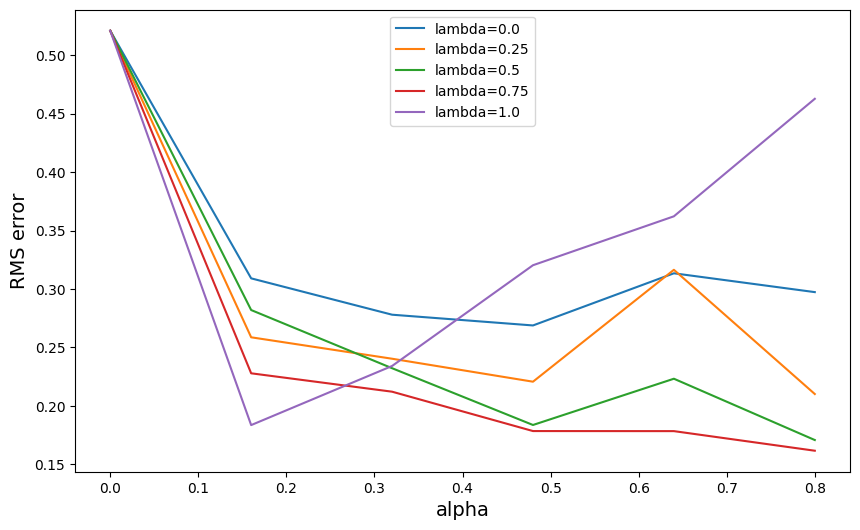

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NUM_STATES =21
START = 9
END_0 = 0
END_1 =20

class ValueFunctionTD:
    def __init__(self,alpha = 0.1,gamma =0.9 , lmbda=0.8):
        self.weights =np.zeros(NUM_STATES)
        self.z=np.zeros(NUM_STATES)
        self.alpha=alpha
        self.gamma=gamma
        self.lmbda=lmbda
    def value(self,state):
        v=self.weights[state]
        return v
    def updateZ(self,state):
        dev=1
        self.z*=self.gamma *self.lmbda
        self.z[state] += dev
    def learn(self,state,nxtState,reward):
        delta= reward+self.gamma *self.value(nxtState) -self.value(state)
        delta*=self.alpha
        self.weights+=delta *self.z

class RWTD:
    def __init__(self,start = START,end=False,debug=False):
        self.actions=["left","right"]
        self.state=start
        self.end=end
        self.reward=0
        self.debug=debug
    def chooseAction(self):
        action = np.random.choice(self.actions)
        return action
    def takeAction(self,action):
        new_state=self.state
        if not self.end:
            if action == "left":
                new_state = self.state-1
            else:
                new_state=self.state+1
            if new_state in [END_0,END_1]:
                self.end=True
        return new_state
    def giveReward(self,state):
        if state == END_0:
            return -1
        if state == END_1:
            return 1
        return 0

    def reset(self):
        self.state=START
        self.end=False
        self.states=[]

    def play(self,valueFunc, rounds = 100):
        for _ in range(rounds):
            self.reset()
            action = self.chooseAction()
            while not self.end:
                nxtState=self.takeAction(action)
                self.reward = self.giveReward(nxtState)
                valueFunc.updateZ(self.state)
                valueFunc.learn(self.state, nxtState, self.reward)
                self.state = nxtState
                action = self.chooseAction()
                if self.debug:
                    print("end at {} reward {}".format(self.state, self.reward))

actual_state_values = np.arange(-20, 22, 2) / 20.0


actual_state_values[0] = actual_state_values[-1] = 0

alphas = np.linspace(0, 0.8, 6)
lambdas = np.linspace(0, 1, 5)
rounds = 50

plt.figure(figsize=[10, 6])
for lamb in lambdas:
    alpha_errors = []
    for alpha in alphas:
        valueFunc = ValueFunctionTD(alpha=alpha, lmbda=lamb)
        rw = RWTD(debug=False)
        rw.play(valueFunc, rounds=rounds)
        rmse = np.sqrt(np.mean(np.power(valueFunc.weights - actual_state_values, 2)))
        print("lambda {} alpha {} rmse {}".format(lamb, alpha, rmse))
        alpha_errors.append(rmse)
    plt.plot(alphas, alpha_errors, label="lambda={}".format(lamb))
plt.xlabel("alpha", size=14)
plt.ylabel("RMS error", size=14)
plt.legend()
plt.show()






**Implementation of Q-learning on taxi environment**


In [ ]:
import gym
env = gym.make("Taxi-v3").env
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
import random
from IPython.display import clear_output

# Hyperparameters

alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):

    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.



**Implementation of cartpole environment deep Neural Network**

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


1/1 [==============================] - 0s 24ms/step
Episode 0, Average Reward: 16.0
1/1 [==============================] - 0s 23ms/step


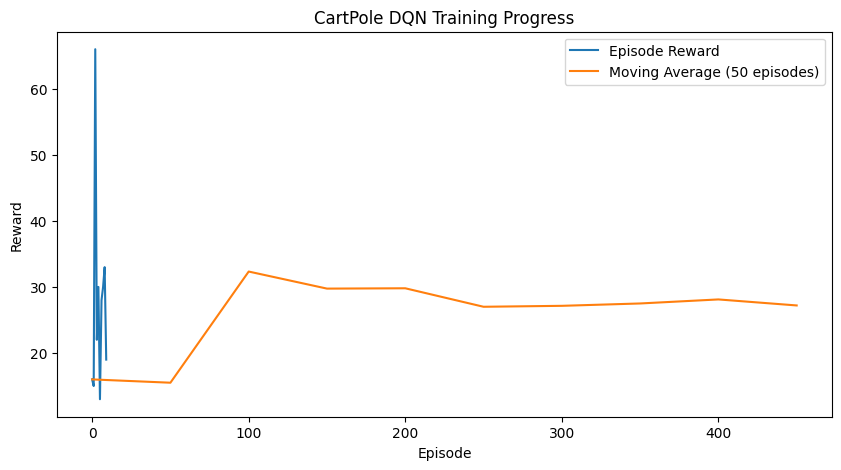

1/1 [==============================] - 0s 23ms/step
Average Reward (Evaluation): 18.3


In [ ]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Define the Q-network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')  # 2 output nodes for left and right actions
])

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

# Training parameters
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 32
target_update_frequency = 100

# Initialize the target Q-network with the same weights as the main Q-network
target_model = tf.keras.models.clone_model(model)
target_model.set_weights(model.get_weights())

# Function to select an action based on epsilon-greedy policy
def select_action(state):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()  # Explore by taking a random action
    else:
        q_values = model.predict(state.reshape(1, -1))
        return np.argmax(q_values)


# Function to update the target Q-network
def update_target_model():
    target_model.set_weights(model.get_weights())

# Training loop
episodes = 10
rewards = []

# Lists to store episode rewards and their moving average
episode_rewards = []
moving_avg_rewards = []

# Visualization: Initialize a figure for plotting rewards
plt.figure(figsize=(10, 5))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('CartPole DQN Training Progress')

for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)
        target = model.predict(state.reshape(1, -1))

        if done:
            target[0][action] = reward
        else:
            target[0][action] = reward + gamma * np.max(target_model.predict(next_state.reshape(1, -1)))

        with tf.GradientTape() as tape:
            q_values = model(state.reshape(1, -1))
            loss = loss_fn(target, q_values)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        state = next_state
        total_reward += reward

        if done:
            rewards.append(total_reward)
            episode_rewards.append(total_reward)

            if epsilon > epsilon_min:
                epsilon *= epsilon_decay
            if episode % target_update_frequency == 0:
                update_target_model()

            if episode % 10 == 0:
                print(f"Episode {episode}, Average Reward: {np.mean(rewards[-10:])}")

            # Visualization: Plot the rewards over episodes every 50 episodes
            if episode % 50 == 0 and episode > 0:
                moving_avg = np.mean(episode_rewards[-50:])
                moving_avg_rewards.append(moving_avg)
                plt.plot(rewards, label='Episode Reward')
                plt.plot(np.arange(len(moving_avg_rewards)) * 50, moving_avg_rewards, label='Moving Average (50 episodes)')
                plt.legend()
                plt.pause(0.1)
            break

# Final visualization: Plot the rewards and moving average
moving_avg_rewards = [np.mean(episode_rewards[i-50:i+1]) if i >= 50 else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(rewards, label='Episode Reward')
plt.plot(np.arange(len(moving_avg_rewards)) * 50, moving_avg_rewards, label='Moving Average (50 episodes)')
plt.legend()
plt.show()
# Evaluate the trained model
total_rewards = []
for _ in range(10):
    state = env.reset()
    episode_reward = 0
    while True:
        action = np.argmax(model.predict(state.reshape(1, -1)))
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
        if done:
            total_rewards.append(episode_reward)
            break
print("Average Reward (Evaluation):", np.mean(total_rewards))

**Implementation of Attari Games using DDQN**

In [ ]:
!pip install gym tensorflow numpy
import gym
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Subtract, Lambda
from tensorflow.keras.optimizers import Adam
# Environment
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
# Hyperparameters
learning_rate = 0.001
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
memory_size = 10000
batch_size = 64

# Replay memory
memory = []

def build_model():
    input_layer = Input(shape=(state_size,))
    fc1 = Dense(24, activation='relu')(input_layer)
    fc2 = Dense(24, activation='relu')(fc1)

    # Value stream
    value_stream = Dense(1)(fc2)

    # Advantage stream
    advantage_stream = Dense(action_size)(fc2)

    # Combine value and advantage streams
    combined = Subtract()([advantage_stream, Lambda(lambda x: tf.reduce_mean(x, axis=1, keepdims=True))(advantage_stream)])

    # Q-value output
    q_values = Lambda(lambda x: x[0] + x[1])([value_stream, combined])

    model = Model(inputs=input_layer, outputs=q_values)
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))
    return model

model = build_model()

for episode in range(1000):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    for time_step in range(500):
        if np.random.rand() <= epsilon:
            action = env.action_space.sample()
        else:
            q_values = model.predict(state)
            action = np.argmax(q_values[0])

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        memory.append((state, action, reward, next_state, done))
        state = next_state
        if done:
            print(f"Episode: {episode + 1}, Score: {time_step + 1}")
            break

        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            for state, action, reward, next_state, done in minibatch:
                target = reward
                if not done:
                    target = reward + gamma * np.amax(model.predict(next_state)[0])
                target_f = model.predict(state)
                target_f[0][action] = target
                model.fit(state, target_f, epochs=1, verbose=0)

            if epsilon > epsilon_min:
                epsilon *= epsilon_decay


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode: 1, Score: 18
Episode: 2, Score: 32
1/1 [==============================] - 0s 62ms/step


KeyboardInterrupt: ignored

**Implementation of Pacman using DDQN**

In [ ]:
class PacManEnvironment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.pacman_x = 1
        self.pacman_y = 1
        self.ghost_x = width - 2
        self.ghost_y = height - 2
        self.food_x = random.randint(1, width - 2)
        self.food_y = random.randint(1, height - 2)
        self.score = 0
        self.done = False

    def reset(self):
        self.pacman_x = 1
        self.pacman_y = 1
        self.ghost_x = self.width - 2
        self.ghost_y = self.height - 2
        self.food_x = random.randint(1, self.width - 2)
        self.food_y = random.randint(1, self.height - 2)
        self.score = 0
        self.done = False

    def get_state(self):
        return (self.pacman_x, self.pacman_y, self.ghost_x, self.ghost_y, self.food_x, self.food_y)

    def take_action(self, action):
        if action == 0:  # Move up
            self.pacman_y -= 1
        elif action == 1:  # Move down
            self.pacman_y += 1
        elif action == 2:  # Move left
            self.pacman_x -= 1
        elif action == 3:  # Move right
            self.pacman_x += 1

        self.pacman_x = max(1, min(self.pacman_x, self.width - 2))
        self.pacman_y = max(1, min(self.pacman_y, self.height - 2))

        if self.pacman_x == self.ghost_x and self.pacman_y == self.ghost_y:
            self.score -= 10
            self.done = True

        if self.pacman_x == self.food_x and self.pacman_y == self.food_y:
            self.score += 10
            self.food_x = random.randint(1, self.width - 2)
            self.food_y = random.randint(1, self.height - 2)

    def is_done(self):
        return self.done

In [ ]:
# Dueling DQN Agent
class DuelingDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = 0.1
        self.q_table = {}

    def select_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)
        return max(range(self.action_size), key=lambda x: self.q_table.get((state, x), 0))

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = max(range(self.action_size), key=lambda x: self.q_table.get((next_state, x), 0))
        old_value = self.q_table.get((state, action), 0)
        next_value = self.q_table.get((next_state, best_next_action), 0)
        new_value = (1 - 0.1) * old_value + 0.1 * (reward + next_value)
        self.q_table[(state, action)] = new_value

# Main training loop
if __name__ == "__main__":
    width = 5
    height = 5
    state_size = 6
    action_size = 4
    env = PacManEnvironment(width, height)
    agent = DuelingDQNAgent(state_size, action_size)

    episodes = 1000
    for episode in range(episodes):
        env.reset()
        total_reward = 0
        while not env.is_done():
            state = env.get_state()
            action = agent.select_action(state)
            env.take_action(action)
            next_state = env.get_state()
            reward = env.score
            agent.update_q_table(state, action, reward, next_state)
            total_reward += reward

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Dueling DQN Agent
class DuelingDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = 0.1
        self.q_table = {}

    def select_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)
        return max(range(self.action_size), key=lambda x: self.q_table.get((state, x), 0))

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = max(range(self.action_size), key=lambda x: self.q_table.get((next_state, x), 0))
        old_value = self.q_table.get((state, action), 0)
        next_value = self.q_table.get((next_state, best_next_action), 0)
        new_value = (1 - 0.1) * old_value + 0.1 * (reward + next_value)
        self.q_table[(state, action)] = new_value

# Main training loop
if __name__ == "__main__":
    width = 5
    height = 5
    state_size = 6
    action_size = 4
    env = PacManEnvironment(width, height)
    agent = DuelingDQNAgent(state_size, action_size)

    episodes = 10
    for episode in range(episodes):
        env.reset()
        total_reward = 0
        while not env.is_done():
            state = env.get_state()
            action = agent.select_action(state)
            env.take_action(action)
            next_state = env.get_state()
            reward = env.score
            agent.update_q_table(state, action, reward, next_state)
            total_reward += reward

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")




Episode: 1, Total Reward: -10
Episode: 2, Total Reward: 52160
Episode: 3, Total Reward: 5850
Episode: 4, Total Reward: -10
Episode: 5, Total Reward: 0
Episode: 6, Total Reward: 2360
Episode: 7, Total Reward: 0
Episode: 8, Total Reward: 0
Episode: 9, Total Reward: 4827190
Episode: 10, Total Reward: -10
Episode: 11, Total Reward: 7023980
Episode: 12, Total Reward: 21359470
Episode: 13, Total Reward: 10200
Episode: 14, Total Reward: 11789760
Episode: 15, Total Reward: 15029300
Episode: 16, Total Reward: 59059660
Episode: 17, Total Reward: 1894130
Episode: 18, Total Reward: 59728680
Episode: 19, Total Reward: 19489990
Episode: 20, Total Reward: 9082660
Episode: 21, Total Reward: 35613260
Episode: 22, Total Reward: 56523230
Episode: 23, Total Reward: 3422360
Episode: 24, Total Reward: 25977000
Episode: 25, Total Reward: 24354280
Episode: 26, Total Reward: 15045790
Episode: 27, Total Reward: 24393450
Episode: 28, Total Reward: 2013410
Episode: 29, Total Reward: 18771360
Episode: 30, Total Re

**Model based Approach (DYNA) on MAZE Env**

Runnin planning steps = 0
Running experiment 0
Running experiment 5
Running experiment 10
Running experiment 15
Running experiment 20
Running experiment 25
Runnin planning steps = 5
Running experiment 0
Running experiment 5
Running experiment 10
Running experiment 15
Running experiment 20
Running experiment 25
Runnin planning steps = 50
Running experiment 0
Running experiment 5
Running experiment 10
Running experiment 15
Running experiment 20
Running experiment 25


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

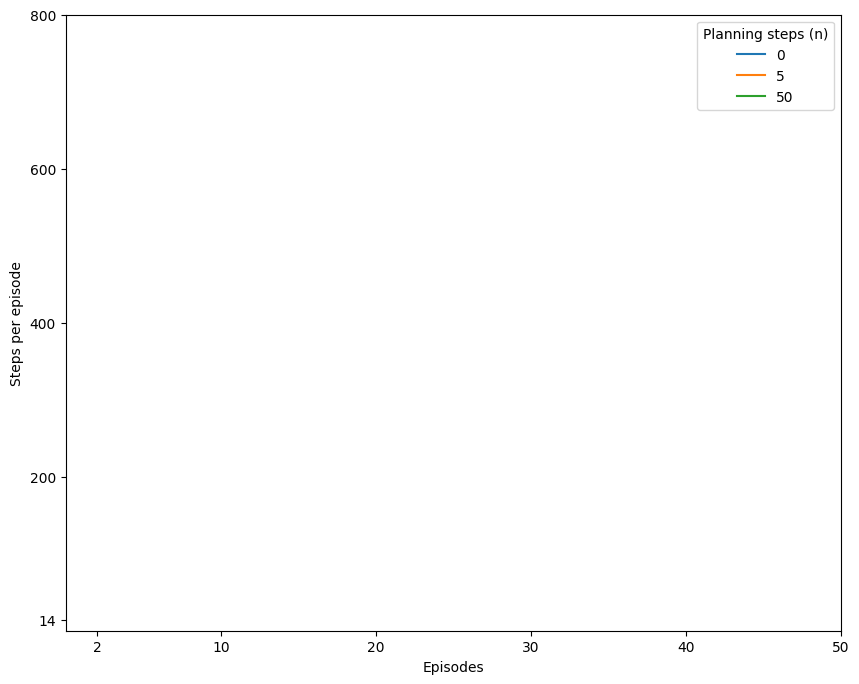

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def choose_action(state):
    choice_values = Q_values[state[0],state[1],:]
    e = np.random.random()
    if e<EPSILON:
        action = np.random.choice(ACTIONS)
    else:
        action = np.random.choice(np.flatnonzero(choice_values == np.max(choice_values)))
    return action
def determine_transitions(state,action):
    terminated = False
    reward = 0
    new_state = state + np.array(ACTION_MOVE[action])
    if new_state[0] == 5 and new_state[1] == 8:
        reward = 1
        terminated = True
    elif new_state[0]==-1 or new_state[0]==6:
        new_state = state
    elif new_state[1] == -1 or new_state[1] == 9:
        new_state = state
    for I in OBSTACLES:
        if new_state[0] == I[0] and new_state[1] == I[1]:
            new_state = state
    return new_state,reward,terminated
def update_model_list(state_list,state,action):
    if len(state_list)==0:
        state_list.append([state,[action]])
    else:
        state_exists = False
        for index,I in enumerate(state_list):
            if I[0][0] == state[0] and I[0][1] == state[1]:
                state_exists = True
                if action not in I[1]:
                    state_list[index][1].append(action)
        if not state_exists:
            state_list.append([state, [action]])
    return state_list
def update_Qvalues(state1,action,reward,state2):
    choice_values = Q_values[state2[0], state2[1], :]
    max_action = np.random.choice(np.flatnonzero(choice_values == np.max(choice_values)))
    Q_values[state1[0],state1[1],action]+=ALFA*(reward+GAMMA*Q_values[state2[0],state2[1],max_action] -Q_values[state1[0],state1[1],action])
def run_experiments():
    experiment_steps = np.zeros(EPISODES)
    for experiment in range(EXPERIMENTS):
        if experiment in np.arange(0,EXPERIMENTS,EXPERIMENTS/6):
            print('Running experiment {}'.format(experiment))
        steps_episode = np.zeros(EPISODES)
        global Q_values
        Q_values = np.zeros((6,9,4))
        visited_states_list = []
        for episode in range(EPISODES):
            current_state = np.array([3,0])
            terminated = False
            step = 0
            while not terminated:
                action = choose_action(current_state)
                new_state,reward,terminated = determine_transitions(current_state,action)
                visited_states_list = update_model_list(visited_states_list,current_state,action)
                update_Qvalues(current_state,action,reward,new_state)
                current_state = new_state
                for i in range(PLANNING_STEPS):
                    random_choice = np.random.choice(np.arange(len(visited_states_list)))
                    random_state = visited_states_list[random_choice][0]
                    random_action = np.random.choice(visited_states_list[random_choice][1])
                    _new_state,_reward,_ = determine_transitions(random_state,random_action)
                    update_Qvalues(random_state,random_action,_reward,_new_state)
                step+=1
            steps_episode[episode] = step
        experiment_steps+=steps_episode
    experiment_steps/=EXPERIMENTS
    return
EPSILON = 0.1
ALFA = 0.1
GAMMA = 0.95
ACTIONS = np.array([0,1,2,3])
PLANNING_STEPS_CHOICE = [0,5,50]
ACTION_MOVE = [[0, 1], [-1, 0], [0, -1], [1, 0]]
OBSTACLES = [[2,2],[3,2],[4,2],[1,5],[3,7],[4,7],[5,7]]
EXPERIMENTS = 30
EPISODES = 50
experiment_results = np.zeros((3,EPISODES))
for i,PLANNING_STEPS in enumerate(PLANNING_STEPS_CHOICE):
    print('Runnin planning steps = {}'.format(PLANNING_STEPS))
    experiment_results[i,:] = run_experiments()
    plt.figure(figsize=(10,8))
Steps_episode_Plot = plt.subplot()
for i,n in enumerate(PLANNING_STEPS_CHOICE):
    Steps_episode_Plot.plot(np.arange(EPISODES),experiment_results[i,:],label = '{}'.format(n))
Steps_episode_Plot.set_xlabel('Episodes')
Steps_episode_Plot.set_ylabel('Steps per episode')
Steps_episode_Plot.set_ylim((0,800))
Steps_episode_Plot.set_yticks([14,200,400,600,800])
Steps_episode_Plot.set_xticks([2,10,20,30,40,50])
Steps_episode_Plot.legend(title = 'Planning steps (n)')

**IMPLEMENTATION OF ACTOR-CRITIC REINFORCEMENT ALGORITHM ON CARTPOLE ENVIRONMENT**

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuration parameters for the whole setup
seed = 42
gamma = 0.99  # Discount factor for past rewards
max_steps_per_episode = 10000
env = gym.make("CartPole-v0")  # Create the environment
env.seed(seed)
eps = np.finfo(np.float32).eps.item()
num_inputs = 4
num_actions = 2
num_hidden = 128

inputs = layers.Input(shape=(num_inputs,))
common = layers.Dense(num_hidden, activation="relu")(inputs)
action = layers.Dense(num_actions, activation="softmax")(common)
critic = layers.Dense(1)(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

while True:  # Run until solved
    state = env.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, max_steps_per_episode):
            # env.render(); Adding this line would show the attempts
            # of the agent in a pop up window.

            state = tf.convert_to_tensor(state)
            state = tf.expand_dims(state, 0)

            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])

            # Sample action from action probability distribution
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))

            # Apply the sampled action in our environment
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. We took an action with log probability
            # of `log_prob` and ended up recieving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads to
            # high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

    if running_reward > 195:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


running reward: 8.25 at episode 10
running reward: 9.61 at episode 20
running reward: 12.47 at episode 30
running reward: 20.59 at episode 40
running reward: 22.65 at episode 50
running reward: 34.50 at episode 60
running reward: 57.91 at episode 70
running reward: 54.75 at episode 80
running reward: 54.33 at episode 90
running reward: 59.82 at episode 100
running reward: 66.10 at episode 110
running reward: 71.30 at episode 120
running reward: 84.24 at episode 130
running reward: 101.13 at episode 140
running reward: 111.25 at episode 150
running reward: 110.14 at episode 160
running reward: 119.67 at episode 170
running reward: 125.22 at episode 180
running reward: 126.06 at episode 190
running reward: 146.49 at episode 200
running reward: 165.94 at episode 210
running reward: 179.22 at episode 220
running reward: 167.13 at episode 230
running reward: 137.95 at episode 240
running reward: 139.26 at episode 250
running reward: 156.07 at episode 260
running reward: 172.59 at episode 27

**IMPLEMENTATION OF PPO IN TAXI ENVIRONMENT**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
# Define your policy network
class PolicyNetwork(tf.keras.Model):
    def __init__(self, num_actions):
        super(PolicyNetwork, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(num_actions, activation='softmax')

    def call(self, state):
        x = self.dense1(state)
        return self.dense2(x)

# Initialize policy network
num_actions = env.action_space.n
policy_network = PolicyNetwork(num_actions)

optimizer = Adam(learning_rate=0.001)
def ppo_loss(old_probs, new_probs, advantages, epsilon=0.2):
    ratio = new_probs / (old_probs + 1e-5)
    surrogate1 = ratio * advantages
    surrogate2 = tf.clip_by_value(ratio, 1 - epsilon, 1 + epsilon) * advantages
    return -tf.reduce_mean(tf.minimum(surrogate1, surrogate2))

def train_ppo(policy_network, optimizer, states, actions, old_probs, advantages):
    with tf.GradientTape() as tape:
        new_probs = policy_network(states)
        loss = ppo_loss(old_probs, new_probs, advantages)
    grads = tape.gradient(loss, policy_network.trainable_variables)
    optimizer.apply_gradients(zip(grads, policy_network.trainable_variables))
# Training loop
num_episodes = 1000
max_steps = 200
discount_factor = 0.99
observation = env.reset()
tf.debugging.enable_check_numerics()
for episode in range(num_episodes):
    states = []
    actions = []
    rewards = []
    old_probs = []

    for step in range(max_steps):
        state = np.reshape(observation, [1, -1])
        states.append(state)

        action_probs = policy_network(state)
        action = np.random.choice(num_actions, p=np.squeeze(action_probs))
        actions.append(action)
        old_probs.append(action_probs[0][action])

        observation, reward, done, _ = env.step(action)
        rewards.append(reward)

        if done:
            break

    discounted_rewards = []
    advantage = 0
    for r in rewards[::-1]:
        advantage = r + discount_factor * advantage
        discounted_rewards.append(advantage)
    discounted_rewards.reverse()
    advantages = discounted_rewards

    states = tf.concat(states, axis=0)
    actions = np.array(actions)
    old_probs = tf.convert_to_tensor(old_probs, dtype=tf.float32)
    advantages = tf.convert_to_tensor(advantages, dtype=tf.float32)

    train_ppo(policy_network, optimizer, states, actions, old_probs, advantages)

    if episode % 10 == 0:
        print(f"Episode: {episode}, Total Reward: {np.sum(rewards)}")

InvalidArgumentError: ignored